## Load FATAL data

In [14]:
%run ./FATAL_data_count.ipynb

[ContentFile(path="D2-documentation"), ContentFile(path="DATA"), ContentFile(path="README.md"), ContentFile(path="scripts")]
ContentFile(path="D2-documentation")
ContentFile(path="DATA")
ContentFile(path="README.md")
ContentFile(path="scripts")
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/FATAL_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_14to15_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_16to19_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_20to24_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_25to34_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_35to44_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_45to54_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-da

## Select Generic Database to work with

In [15]:
genericDB_files_dict = {}

desired_file_prefix = "NF_LOS"  # "NF_AGE_14to15_all.csv"

## Create above database dictionary

In [16]:
# pull in the data

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (desired_file_prefix in url):
        print(url)
        
        name = url.split("/")[-1].split("_all")[0]
        print(name)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        
        #print(source)
        decoded_data = source.decode("utf-8")
        genericDB_files_dict.setdefault(name, []).append(decoded_data)
        #genericDB.append(decoded_data)   

#print(genericDB_files_dict)

https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_1to5yr_all.csv
NF_LOS_1to5yr
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_3to11mos_all.csv
NF_LOS_3to11mos
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_5plus_all.csv
NF_LOS_5plus
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_NR_all.csv
NF_LOS_NR
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_LOS_ltg3mos_all.csv
NF_LOS_ltg3mos


In [17]:
# Create a dictionary of soc_codes
#
genericDB_dict = {}


# Create Dictionary of SOC codes
#
for db in genericDB_files_dict.keys():
    
    genericDB = genericDB_files_dict[db]
    
    #print(genericDB[0])    
    line = genericDB[0].replace("\"","")
    genericDB_array= line.split("\n")
    #print(genericDB_array[12:])
    
    # Line 12 is where the header stops and the data starts
    #
    for line in genericDB_array[12:]:
        line_array = line.split(",")
        #key  = line_array[0].    [0:7].replace("-","")
        key  = line_array[0][6:12]
        data = line_array[1:]
        #print(line_array)
        #print(key,data)

        # Replace empty values with zero
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                if (len(data[index]) == 0):
                    data[index] = '0'
            #print(key,data[0:8])
        
        # Convert to Integers
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                data[index] = int(data[index])
            #print(key,data[0:8])   
            
        # Create dictionary entry
        if (len(key) > 1):
            genericDB_dict.setdefault(db+"_"+key, []).append(data[0:8])
    
#index = 0
#for key in genericDB_dict:
#    print(index, key, genericDB_dict[key])
#    index = index + 1

In [18]:
#print(genericDB_dict['NF_GENDER_F_113020'][0])

## Create SOC Level Groups
Create SOC Level Groups for SOC work groups as a dictionary of keys

Level 1 "11XXXX", "12XXXX"....<br>
Level 2 "110XXX", "111XXX", "120XXX"...<br>
Level 3 "1101XX", "1102XX", "1201XX"......<br>

In [19]:
#level1_sockeys = {}
#level2_sockeys = {}
#level3_sockeys = {}

#for key in soc_dict.keys():
#    lev1 = key[0:2]
#    lev2 = key[0:3]
#    lev3 = key[0:6]
#    #print(lev1)
#    level1_sockeys.setdefault(lev1, []).append(key)
#    level2_sockeys.setdefault(lev2, []).append(key)
#    level3_sockeys.setdefault(lev3, []).append(key)
    
##print(level1_sockeys)

## Create a count of DATABASE data for the diferent level soc groups

In [20]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)+"0000"]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

## SOC code that were not found in the data set

In [21]:
#print(no_genericDB_data_dict.keys())

## Create a RELATIVE count of DATABASE data for the diferent level soc groups



In [22]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
   
 # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,relative_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

## Plot level 1 RELATIVE count of DATABASE data for the diferent level soc groups


In [23]:
x = [1,2,3,4,5,6,7,8]

no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+" - "+index,category,relative_totals)
            
            #plt.figure(str(db)+"\t"+str(category))
            #plt.plot(x,relative_totals, label=str(category))


## Scatter plot level 1 RELATIVE average count of DATABASE data for soc groups

NF_LOS_1to5yr - 11 ['Management Occupations'] [3.25192677e-05 3.11613848e-05 3.30240085e-05 3.53094877e-05
 3.04127003e-05 2.99213070e-05 3.39547044e-05 2.98944725e-05]
NF_LOS_1to5yr - 13 ['Business and Financial Operations Occupations'] [1.18189339e-04 9.48676596e-05 9.00819746e-05 1.10607234e-04
 9.82221786e-05 1.21197431e-04 9.38878978e-05 1.01926409e-04]
NF_LOS_1to5yr - 15 ['Computer and Mathematical Occupations'] [0.00089206 0.00107411 0.00107411 0.00121803 0.00117509 0.00113507
 0.00136799 0.00113507]
NF_LOS_1to5yr - 17 ['Architecture and Engineering Occupations'] [0.00019681 0.00021687 0.00038595 0.00021829 0.00020916 0.00040634
 0.00014791 0.00026103]
NF_LOS_1to5yr - 19 ['Life, Physical, and Social Science Occupations'] [0.00024266 0.00038595 0.00029842 0.00026518 0.000392   0.00048757
 0.00029665 0.00035448]
NF_LOS_1to5yr - 21 ['Community and Social Service Occupations'] [5.07588447e-05 5.06303478e-05 5.96979285e-05 5.58004576e-05
 5.39345235e-05 4.37043835e-05 5.95912043e-05 

<IPython.core.display.Javascript object>


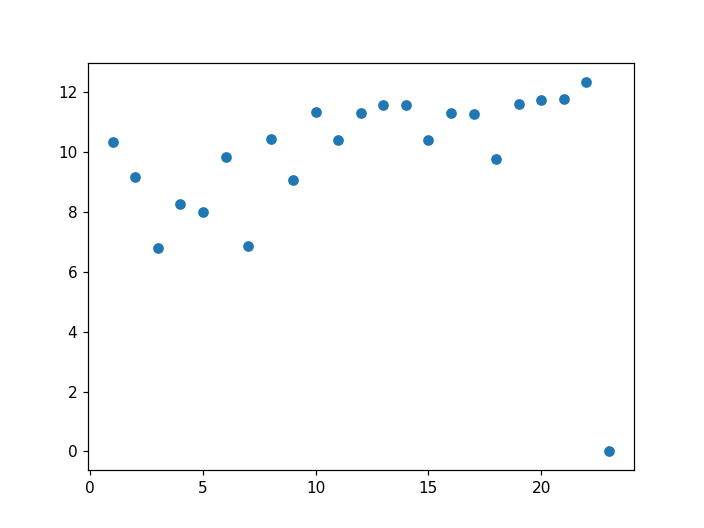

NF_LOS_3to11mos - 11 ['Management Occupations'] [7.21969533e-05 9.92950055e-05 8.46668360e-05 1.15194102e-04
 9.06536125e-05 1.09998900e-04 7.67990170e-05 7.08165144e-05]
NF_LOS_3to11mos - 13 ['Business and Financial Operations Occupations'] [0.00028727 0.0002949  0.00025374 0.00021782 0.00038895 0.00023469
 0.00018584 0.00024207]
NF_LOS_3to11mos - 15 ['Computer and Mathematical Occupations'] [0.00269542 0.00369004 0.00473934 0.00383142 0.00175131 0.00398406
 0.00662252 0.00621118]
NF_LOS_3to11mos - 17 ['Architecture and Engineering Occupations'] [0.00105152 0.00048286 0.00067981 0.00052882 0.00096061 0.00058106
 0.00112233 0.00037023]
NF_LOS_3to11mos - 19 ['Life, Physical, and Social Science Occupations'] [0.00062461 0.000819   0.00133156 0.00034471 0.00146843 0.00101937
 0.00090827 0.00149031]
NF_LOS_3to11mos - 21 ['Community and Social Service Occupations'] [1.53350713e-04 1.24984377e-04 1.08448108e-04 1.22684333e-04
 1.33315558e-04 8.62738331e-05 1.13494496e-04 9.81257973e-05]
NF_L

<IPython.core.display.Javascript object>


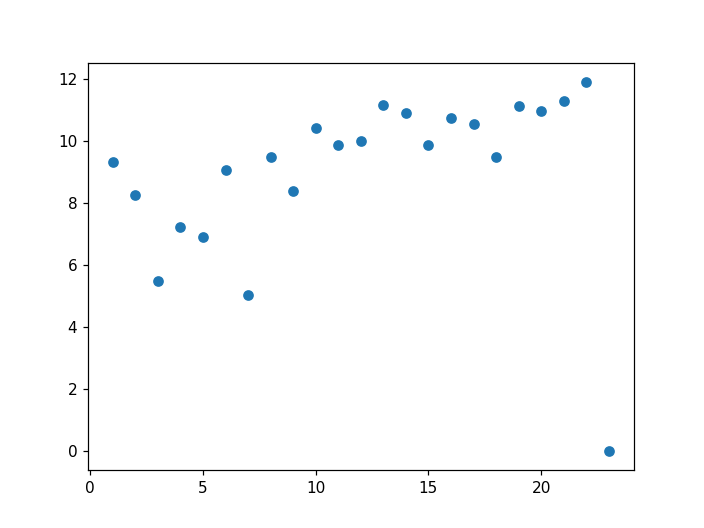

NF_LOS_5plus - 11 ['Management Occupations'] [1.79723585e-05 1.78663951e-05 1.78186419e-05 1.82711809e-05
 1.70703812e-05 2.18288184e-05 2.19053252e-05 1.94435263e-05]
NF_LOS_5plus - 13 ['Business and Financial Operations Occupations'] [6.05656835e-05 6.31672036e-05 5.58316119e-05 5.24356353e-05
 7.07163567e-05 7.28279077e-05 7.43992262e-05 7.25636746e-05]
NF_LOS_5plus - 15 ['Computer and Mathematical Occupations'] [0.00056148 0.00026171 0.00042176 0.00052882 0.00070373 0.00072939
 0.00072411 0.00054318]
NF_LOS_5plus - 17 ['Architecture and Engineering Occupations'] [0.00013945 0.00014083 0.00011627 0.00013156 0.00013753 0.00016748
 0.00021317 0.00018312]
NF_LOS_5plus - 19 ['Life, Physical, and Social Science Occupations'] [0.00021782 0.00019451 0.00024384 0.00021137 0.00024325 0.00021363
 0.00031046 0.0002881 ]
NF_LOS_5plus - 21 ['Community and Social Service Occupations'] [4.13035397e-05 3.85044858e-05 3.62568435e-05 3.53344405e-05
 4.35142074e-05 4.11167304e-05 4.39348008e-05 5.3530

<IPython.core.display.Javascript object>


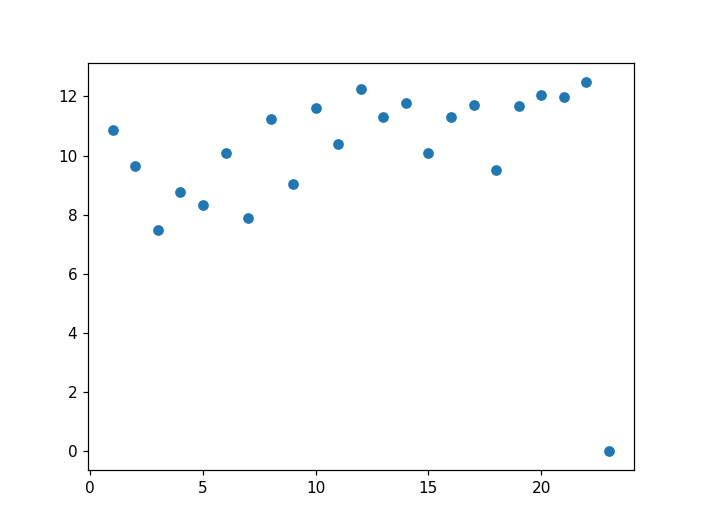

NF_LOS_NR - 11 ['Management Occupations'] [0.00121803 0.00166389 0.00030479 0.00232019 0.00063251 0.00108578
 0.00158479 0.00123305]
NF_LOS_NR - 13 ['Business and Financial Operations Occupations'] [0.00151286 0.00269542 0.00163666 0.00226757 0.00332226 0.00199601
 0.00662252 0.00452489]
NF_LOS_NR - 15 ['Computer and Mathematical Occupations'] [0.01960784 0.04761905 0.02439024 0.03225806 0.01408451 0.04761905
 0.04761905 0.04761905]
NF_LOS_NR - 17 ['Architecture and Engineering Occupations'] [0.00473934 0.04761905 0.01408451 0.00188324 0.01639344 0.00497512
 0.01408451 0.00452489]
NF_LOS_NR - 19 ['Life, Physical, and Social Science Occupations'] [0.04761905 0.04761905 0.03225806 0.00990099 0.00990099 0.00826446
 0.00763359 0.04761905]
NF_LOS_NR - 21 ['Community and Social Service Occupations'] [0.00120337 0.00188324 0.00107411 0.00142653 0.00045641 0.00133156
 0.00109769 0.00082576]
NF_LOS_NR - 23 ['Legal Occupations'] [1.         1.         1.         1.         1.         0.04761905


<IPython.core.display.Javascript object>


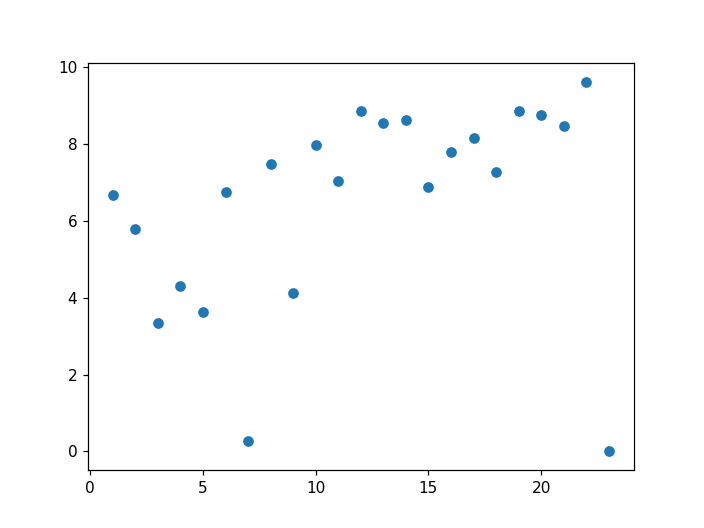

NF_LOS_ltg3mos - 11 ['Management Occupations'] [0.00057438 0.00047824 0.00032041 0.00027093 0.00028893 0.00023469
 0.00023196 0.00024685]
NF_LOS_ltg3mos - 13 ['Business and Financial Operations Occupations'] [0.000408   0.00100908 0.0003758  0.00095147 0.00092507 0.00096061
 0.00083963 0.00098912]
NF_LOS_ltg3mos - 15 ['Computer and Mathematical Occupations'] [0.01098901 0.03225806 0.01408451 0.01639344 0.01098901 0.01098901
 0.01408451 0.03225806]
NF_LOS_ltg3mos - 17 ['Architecture and Engineering Occupations'] [0.00269542 0.00121803 0.00175131 0.00169205 0.00086881 0.0021692
 0.00181488 0.00199601]
NF_LOS_ltg3mos - 19 ['Life, Physical, and Social Science Occupations'] [0.00243309 0.00184843 0.00369004 0.00203666 0.00302115 0.00262467
 0.00172117 0.00166389]
NF_LOS_ltg3mos - 21 ['Community and Social Service Occupations'] [0.00069396 0.0002881  0.00031046 0.00046062 0.0004384  0.00035448
 0.00033772 0.00035575]
NF_LOS_ltg3mos - 23 ['Legal Occupations'] [4.76190476e-02 4.14937759e-03 5.

<IPython.core.display.Javascript object>


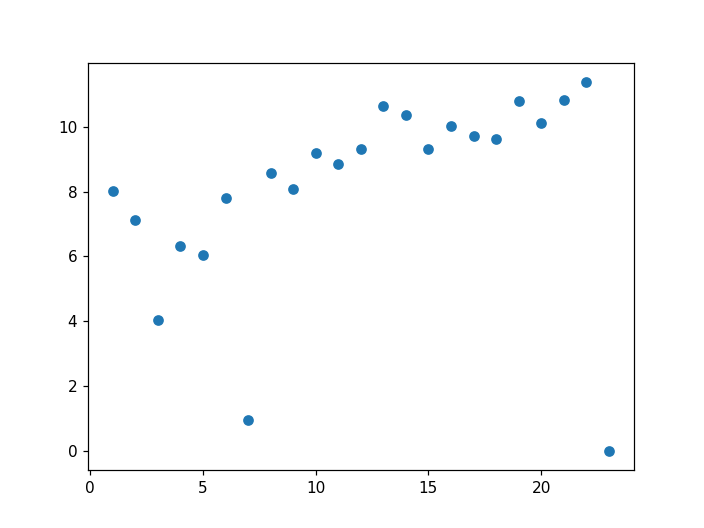

In [24]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018 
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level1_sockeys.keys():
        #print(index,db)
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)  
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            print(db+" - "+index,category,relative_totals)
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            
    plt.figure(str(db)+", mean per SOC code level 1")
    plt.plot(x,y,'o')
    plt.show()

## Scatter plot level 6 RELATIVE average count of DATABASE data for soc groups

NF_LOS_1to5yr	110000 ['Management Occupations'] [0.00012737 0.00012223 0.00013019 0.00013906 0.00012047 0.00011861
 0.00013385 0.00011708]
NF_LOS_1to5yr	111000 ['Top Executives'] [0.00131406 0.0005777  0.00064893 0.00084674 0.00082576 0.00057438
 0.00072939 0.00107411]
NF_LOS_1to5yr	111010 ['Chief Executives'] [0.00662252 0.01098901 0.01098901 0.01408451 0.04761905 0.01234568
 0.00232019 0.00900901]
NF_LOS_1to5yr	111011 ['Chief Executives'] [0.00662252 0.01098901 0.01098901 0.01408451 0.04761905 0.01234568
 0.00232019 0.00900901]
NF_LOS_1to5yr	111020 ['General and Operations Managers'] [0.00163666 0.00060938 0.00068918 0.00090827 0.00083963 0.00060205
 0.0010627  0.00120337]
NF_LOS_1to5yr	111021 ['General and Operations Managers'] [0.00163666 0.00060938 0.00068918 0.00090827 0.00083963 0.00060205
 0.0010627  0.00120337]
NF_LOS_1to5yr	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	112000 ['Advertising, Market

NF_LOS_1to5yr	372020 ['Pest Control Workers'] [0.00134953 0.00232019 0.0021692  0.00199601 0.00311526 0.00079302
 0.00161031 0.00140647]
NF_LOS_1to5yr	372021 ['Pest Control Workers'] [0.00134953 0.00232019 0.0021692  0.00199601 0.00311526 0.00079302
 0.00161031 0.00140647]
NF_LOS_1to5yr	373000 ['Grounds Maintenance Workers'] [0.00017665 0.00017209 0.00023469 0.00016445 0.00023747 0.00014512
 0.00014575 0.00017603]
NF_LOS_1to5yr	373010 ['Grounds Maintenance Workers'] [0.00017665 0.00017209 0.00023469 0.00016445 0.00023747 0.00014512
 0.00014575 0.00017603]
NF_LOS_1to5yr	373011 ['Landscaping and Groundskeeping Workers'] [0.00022217 0.0002028  0.00030855 0.00018584 0.00026309 0.00016023
 0.0001587  0.00020572]
NF_LOS_1to5yr	373012 ['Pesticide Handlers, Sprayers, and Applicators, Vegetation'] [0.00763359 0.00269542 0.04761905 0.01960784 0.04761905 1.
 1.         0.02439024]
NF_LOS_1to5yr	373013 ['Tree Trimmers and Pruners'] [0.00293255 0.00302115 0.00212314 0.002079   0.00398406 0.0021692


NF_LOS_1to5yr	537020 ['Crane and Tower Operators'] [0.00990099 0.02439024 0.00826446 0.00990099 0.00990099 0.01234568
 0.01234568 0.00662252]
NF_LOS_1to5yr	537021 ['Crane and Tower Operators'] [0.00990099 0.02439024 0.00826446 0.00990099 0.00990099 0.01234568
 0.01234568 0.00662252]
NF_LOS_1to5yr	537030 ['Dredge Operators'] [0.00473934 0.00826446 0.01639344 0.00452489 0.00497512 0.00763359
 0.01639344 0.00826446]
NF_LOS_1to5yr	537031 ['Dredge Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_1to5yr	537040 ['Hoist and Winch Operators'] [1.         1.         0.00826446 0.01098901 0.01234568 0.04761905
 0.04761905 0.01408451]
NF_LOS_1to5yr	537041 ['Hoist and Winch Operators'] [1.         1.         0.00826446 0.01098901 0.01234568 0.04761905
 0.04761905 0.01408451]
NF_LOS_1to5yr	537050 ['Industrial Truck and Tractor Operators'] [0.00058789 0.00059137 0.00064061 0.000757   0.00060938 0.00069396
 0.00069881 0.00065317]
NF_LOS_1to5yr	537051 ['Industrial Truck and Tractor Operators'] [0.00058789 

<IPython.core.display.Javascript object>


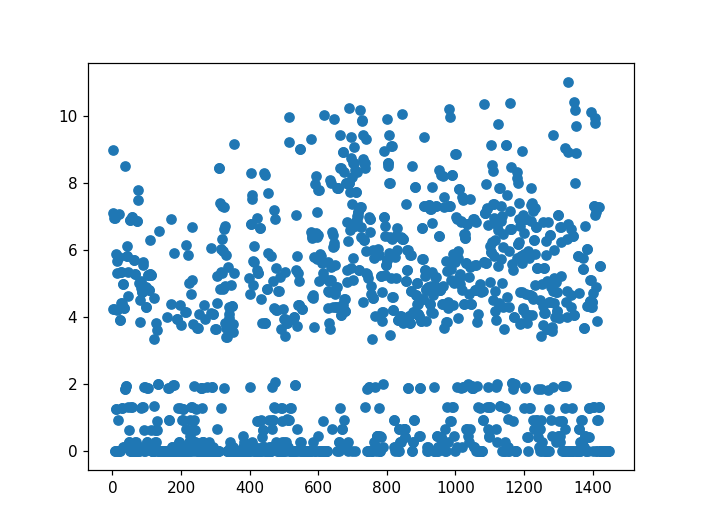

NF_LOS_3to11mos	110000 ['Management Occupations'] [0.00028161 0.00038447 0.00032884 0.00044623 0.00035448 0.00043271
 0.00030386 0.00027847]
NF_LOS_3to11mos	111000 ['Top Executives'] [0.00118906 0.00473934 0.00104058 0.004329   0.00277008 0.00473934
 0.00302115 0.00383142]
NF_LOS_3to11mos	111010 ['Chief Executives'] [1.         1.         0.00473934 0.04761905 0.00990099 1.
 0.01960784 0.01408451]
NF_LOS_3to11mos	111011 ['Chief Executives'] [1.         1.         0.00473934 0.04761905 0.00990099 1.
 0.01960784 0.01408451]
NF_LOS_3to11mos	111020 ['General and Operations Managers'] [0.00120337 0.00473934 0.00134953 0.00473934 0.00398406 0.00497512
 0.00343643 0.0052356 ]
NF_LOS_3to11mos	111021 ['General and Operations Managers'] [0.00120337 0.00473934 0.00134953 0.00473934 0.00398406 0.00497512
 0.00343643 0.0052356 ]
NF_LOS_3to11mos	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	112000 ['Advertising, Mark

NF_LOS_3to11mos	292043 ['Paramedics'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	292050 ['Health Practitioner Support Technologists and Technicians'] [0.00070373 0.00066181 0.00075131 0.00068446 0.00048996 0.00069881
 0.00051256 0.00048996]
NF_LOS_3to11mos	292051 ['Dietetic Technicians'] [0.00178253 0.0021692  0.00277008 0.00232019 0.00199601 0.0021692
 0.0021692  0.002079  ]
NF_LOS_3to11mos	292052 ['Pharmacy Technicians'] [0.01960784 0.01639344 0.00826446 0.01408451 0.01408451 0.01639344
 0.00900901 0.00552486]
NF_LOS_3to11mos	292053 ['Psychiatric Technicians'] [0.00302115 0.00255754 0.00226757 0.00269542 0.00195695 0.00184843
 0.00156006 0.00110988]
NF_LOS_3to11mos	292055 ['Surgical Technologists'] [0.00497512 0.0052356  0.0070922  0.00369004 0.00497512 0.00497512
 0.00311526 0.00497512]
NF_LOS_3to11mos	292056 ['Veterinary Technologists and Technicians'] [0.00369004 0.00255754 0.00383142 0.00332226 0.00321543 0.00584795
 0.00255754 0.00369004]
NF_LOS_3to11mos	292057 ['Ophthalmic Medic

 0.00221729 0.00163666]
NF_LOS_3to11mos	373000 ['Grounds Maintenance Workers'] [0.00033102 0.00028161 0.00035448 0.00026874 0.00036219 0.00024624
 0.00028482 0.00022671]
NF_LOS_3to11mos	373010 ['Grounds Maintenance Workers'] [0.00033102 0.00028161 0.00035448 0.00026874 0.00036219 0.00024624
 0.00028482 0.00022671]
NF_LOS_3to11mos	373011 ['Landscaping and Groundskeeping Workers'] [0.0003635  0.00033659 0.00044033 0.00029842 0.00040469 0.00027925
 0.00030294 0.00025374]
NF_LOS_3to11mos	373012 ['Pesticide Handlers, Sprayers, and Applicators, Vegetation'] [1.         0.01408451 0.00584795 1.         0.01234568 0.00321543
 0.04761905 1.        ]
NF_LOS_3to11mos	373013 ['Tree Trimmers and Pruners'] [0.00552486 0.0021692  0.0070922  0.00621118 0.00763359 0.00662252
 0.00990099 0.00232019]
NF_LOS_3to11mos	373019 ['Grounds Maintenance Workers, All Other'] [0.01234568 0.01639344 0.00414938 0.00497512 0.01408451 0.03225806
 0.01098901 0.02439024]
NF_LOS_3to11mos	390000 ['Personal Care and Service

NF_LOS_3to11mos	517032 ['Patternmakers, Wood'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	517040 ['Woodworking Machine Setters, Operators, and Tenders'] [0.00398406 0.00243309 0.00311526 0.00181488 0.00332226 0.00293255
 0.00277008 0.002849  ]
NF_LOS_3to11mos	517041 ['Sawing Machine Setters, Operators, and Tenders, Wood'] [0.00497512 0.004329   0.00552486 0.00293255 0.00584795 0.00452489
 0.00355872 0.00414938]
NF_LOS_3to11mos	517042 ['Woodworking Machine Setters, Operators, and Tenders, Except Sawing'] [0.01960784 0.00552486 0.0070922  0.00473934 0.00763359 0.00763359
 0.01408451 0.00900901]
NF_LOS_3to11mos	517090 ['Miscellaneous Woodworkers'] [0.04761905 0.01408451 0.01960784 1.         0.04761905 0.04761905
 0.04761905 1.        ]
NF_LOS_3to11mos	517099 ['Woodworkers, All Other'] [0.04761905 0.01408451 0.01960784 1.         0.04761905 0.04761905
 0.04761905 1.        ]
NF_LOS_3to11mos	518000 ['Plant and System Operators'] [0.004329   0.00355872 0.00161031 0.0052356  0.0070922  0.0062

NF_LOS_3to11mos	553000 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553010 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553011 ['Air Crew Members'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553012 ['Aircraft Launch and Recovery Specialists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553013 ['Armored Assault Vehicle Crew Members'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553014 ['Artillery and Missile Crew Members'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553015 ['Command and Control Center Specialists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553016 ['Infantry'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553018 ['Special Forces'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_3to11mos	553019 ['Military Enlisted Tactical Operations and Air/Weapons Specialists and Crew Members, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


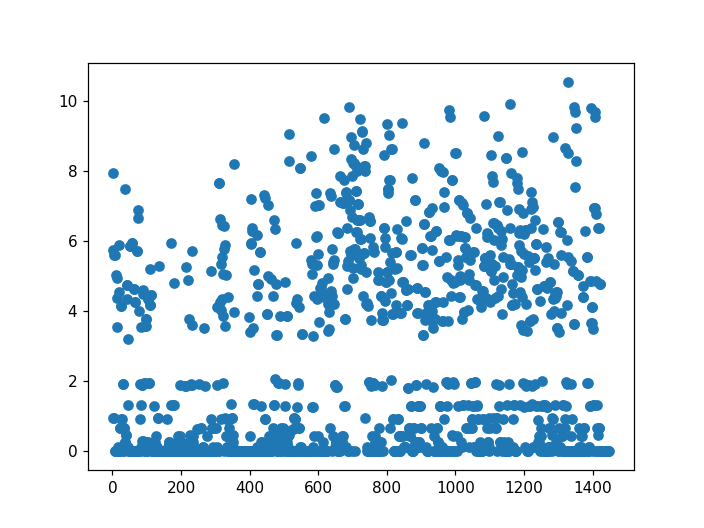

NF_LOS_5plus	110000 ['Management Occupations'] [7.06164819e-05 6.99741096e-05 6.97788012e-05 7.19890577e-05
 6.76544212e-05 8.59771301e-05 8.60511144e-05 7.65638159e-05]
NF_LOS_5plus	111000 ['Top Executives'] [0.00042176 0.00030386 0.00041477 0.00054318 0.00048286 0.00048757
 0.00052056 0.00043271]
NF_LOS_5plus	111010 ['Chief Executives'] [0.00249377 0.00136799 0.00142653 0.0052356  0.0070922  0.00151286
 0.00311526 0.0010627 ]
NF_LOS_5plus	111011 ['Chief Executives'] [0.00249377 0.00136799 0.00142653 0.0052356  0.0070922  0.00151286
 0.00311526 0.0010627 ]
NF_LOS_5plus	111020 ['General and Operations Managers'] [0.00050994 0.00039047 0.00058445 0.00060569 0.00051787 0.00073475
 0.00062854 0.00072939]
NF_LOS_5plus	111021 ['General and Operations Managers'] [0.00050994 0.00039047 0.00058445 0.00060569 0.00051787 0.00073475
 0.00062854 0.00072939]
NF_LOS_5plus	111030 ['Legislators'] [1.         1.         1.         1.         1.         0.03225806
 1.         1.        ]
NF_LOS_5plus	11

NF_LOS_5plus	253041 ['Tutors'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	253090 ['Miscellaneous Teachers and Instructors'] [0.0006169  0.00060205 0.00044425 0.0005711  0.00072411 0.00058789
 0.00058789 0.00086133]
NF_LOS_5plus	253099 ['Teachers and Instructors, All Other'] [0.0006169  0.00060205 0.00044425 0.0005711  0.00072411 0.00058789
 0.00058789 0.00086133]
NF_LOS_5plus	254000 ['Librarians, Curators, and Archivists'] [0.00232019 0.00169205 0.002079   0.00199601 0.00221729 0.00293255
 0.00332226 0.00212314]
NF_LOS_5plus	254010 ['Archivists, Curators, and Museum Technicians'] [0.01639344 0.01960784 0.02439024 0.01639344 0.01408451 0.01098901
 0.01408451 0.01408451]
NF_LOS_5plus	254011 ['Archivists'] [1.         0.04761905 1.         1.         1.         1.
 1.         1.        ]
NF_LOS_5plus	254012 ['Curators'] [0.02439024 0.04761905 0.04761905 1.         0.02439024 0.01408451
 1.         0.03225806]
NF_LOS_5plus	254013 ['Museum Technicians and Conservators'] [1.         0.04761905 0

 0.00262467 0.00497512]
NF_LOS_5plus	292072 ['Medical Records Specialists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	292080 ['Opticians, Dispensing'] [1.         0.00826446 0.03225806 0.01960784 0.01098901 1.
 0.03225806 1.        ]
NF_LOS_5plus	292081 ['Opticians, Dispensing'] [1.         0.00826446 0.03225806 0.01960784 0.01098901 1.
 0.03225806 1.        ]
NF_LOS_5plus	292090 ['Miscellaneous Health Technologists and Technicians'] [0.00226757 0.00120337 0.00203666 0.00249377 0.00199601 0.00255754
 0.00311526 0.00293255]
NF_LOS_5plus	292091 ['Orthotists and Prosthetists'] [1.         1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_5plus	292092 ['Hearing Aid Specialists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	292099 ['Health Technologists and Technicians, All Other'] [0.00232019 0.00123305 0.002079   0.00255754 0.002079   0.00262467
 0.00321543 0.00302115]
NF_LOS_5plus	299000 ['Other Healthcare Practitioners and Technical Occupations'] [0.00255754 0.0019569

 0.0052356  0.00175131]
NF_LOS_5plus	339092 ['Lifeguards, Ski Patrol, and Other Recreational Protective Service Workers'] [0.00302115 0.00662252 0.00900901 0.0070922  0.00383142 0.00473934
 0.00414938 0.00662252]
NF_LOS_5plus	339093 ['Transportation Security Screeners'] [0.02439024 1.         1.         1.         1.         1.
 1.         1.        ]
NF_LOS_5plus	339094 ['School Bus Monitors'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	339099 ['Protective Service Workers, All Other'] [0.00156006 0.00138696 0.00107411 0.00101937 0.00124844 0.0015361
 0.00109769 0.00120337]
NF_LOS_5plus	350000 ['Food Preparation and Serving Related Occupations'] [4.67267885e-05 4.69461528e-05 4.24971314e-05 4.91617915e-05
 4.38384990e-05 5.04261005e-05 5.27955229e-05 4.84238051e-05]
NF_LOS_5plus	351000 ['Supervisors of Food Preparation and Serving Workers'] [0.00035199 0.00041305 0.000257   0.0003471  0.00026947 0.00035075
 0.0003459  0.00025246]
NF_LOS_5plus	351010 ['Supervisors of Food Preparation and Ser

 0.00085397 0.00092507]
NF_LOS_5plus	493011 ['Aircraft Mechanics and Service Technicians'] [0.00071891 0.00083264 0.00118906 0.00090009 0.00110988 0.00098912
 0.00085397 0.00092507]
NF_LOS_5plus	493020 ['Automotive Technicians and Repairers'] [0.00015265 0.00018758 0.00022568 0.0001908  0.00022878 0.00021501
 0.00018688 0.00020198]
NF_LOS_5plus	493021 ['Automotive Body and Related Repairers'] [0.000999   0.00142653 0.00100908 0.00195695 0.00203666 0.00277008
 0.00116144 0.00104058]
NF_LOS_5plus	493022 ['Automotive Glass Installers and Repairers'] [0.00990099 0.00584795 1.         0.03225806 0.00621118 0.00302115
 0.01639344 0.01960784]
NF_LOS_5plus	493023 ['Automotive Service Technicians and Mechanics'] [0.00018312 0.00022416 0.00029061 0.00021272 0.00026802 0.00025246
 0.00022517 0.00025374]
NF_LOS_5plus	493030 ['Bus and Truck Mechanics and Diesel Engine Specialists'] [0.00036617 0.00037722 0.00034471 0.00040634 0.00032041 0.00040634
 0.00047596 0.00040306]
NF_LOS_5plus	493031 ['Bus a

 1.         1.        ]
NF_LOS_5plus	518000 ['Plant and System Operators'] [0.00059844 0.00041477 0.00046926 0.00041649 0.00039825 0.00058106
 0.0005048  0.00060938]
NF_LOS_5plus	518010 ['Power Plant Operators, Distributors, and Dispatchers'] [0.00990099 0.0070922  0.00763359 0.01098901 0.00900901 0.00497512
 0.00621118 0.01098901]
NF_LOS_5plus	518011 ['Nuclear Power Reactor Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	518012 ['Power Distributors and Dispatchers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	518013 ['Power Plant Operators'] [0.00990099 0.00763359 0.00763359 0.01234568 0.00990099 0.00497512
 0.00662252 0.01098901]
NF_LOS_5plus	518020 ['Stationary Engineers and Boiler Operators'] [0.00343643 0.00269542 0.00321543 0.00175131 0.0021692  0.00343643
 0.00497512 0.00452489]
NF_LOS_5plus	518021 ['Stationary Engineers and Boiler Operators'] [0.00343643 0.00269542 0.00321543 0.00175131 0.0021692  0.00343643
 0.00497512 0.00452489]
NF_LOS_5plus	518030 ['Water and Wastewater Treat

 0.00584795 0.00269542]
NF_LOS_5plus	535010 ['Sailors and Marine Oilers'] [0.00473934 0.0070922  0.00763359 0.0052356  0.00621118 0.00369004
 0.00763359 0.0052356 ]
NF_LOS_5plus	535011 ['Sailors and Marine Oilers'] [0.00473934 0.0070922  0.00763359 0.0052356  0.00621118 0.00369004
 0.00763359 0.0052356 ]
NF_LOS_5plus	535020 ['Ship and Boat Captains and Operators'] [0.00763359 0.01098901 0.01234568 0.00662252 0.00990099 0.02439024
 0.02439024 0.00826446]
NF_LOS_5plus	535021 ['Captains, Mates, and Pilots of Water Vessels'] [0.00763359 0.01234568 0.01234568 0.0070922  0.00990099 0.02439024
 0.02439024 0.00826446]
NF_LOS_5plus	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_5plus	535030 ['Ship Engineers'] [0.02439024 1.         0.01960784 0.02439024 0.01960784 0.00900901
 1.         0.01639344]
NF_LOS_5plus	535031 ['Ship Engineers'] [0.02439024 1.         0.01960784 0.02439024 0.01960784 0.00900901
 1.         0.01639344]
NF_LOS_5plus	536000 ['Other Transportation Workers']

<IPython.core.display.Javascript object>


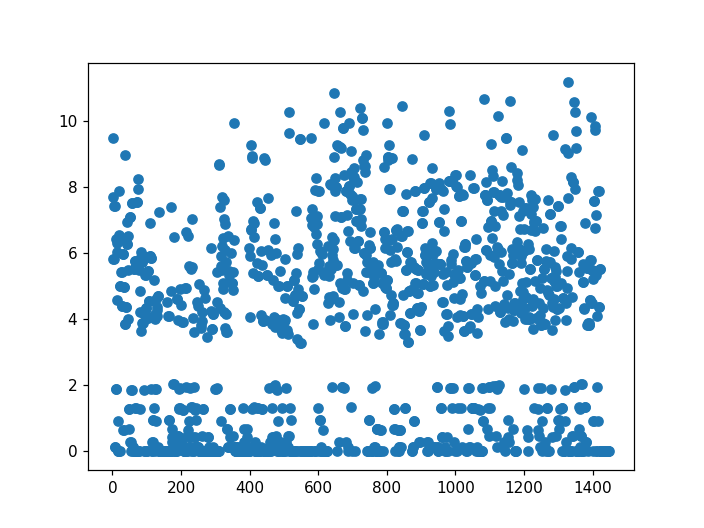

NF_LOS_NR	110000 ['Management Occupations'] [0.00414938 0.0052356  0.00116144 0.0070922  0.00226757 0.00398406
 0.00552486 0.00369004]
NF_LOS_NR	111000 ['Top Executives'] [0.02439024 0.02439024 0.01960784 1.         1.         0.03225806
 0.03225806 0.04761905]
NF_LOS_NR	111010 ['Chief Executives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	111011 ['Chief Executives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	111020 ['General and Operations Managers'] [0.03225806 1.         0.04761905 1.         1.         0.03225806
 0.03225806 0.04761905]
NF_LOS_NR	111021 ['General and Operations Managers'] [0.03225806 1.         0.04761905 1.         1.         0.03225806
 0.03225806 0.04761905]
NF_LOS_NR	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	112000 ['Advertising, Marketing, Promotions, Public Relations, and Sales Managers'] [0.03225806 1.         1.         1.         1.         1.
 1.         1.        ]
NF_LOS_NR	112010 ['Advertis

NF_LOS_NR	191020 ['Biological Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191021 ['Biochemists and Biophysicists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191022 ['Microbiologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191023 ['Zoologists and Wildlife Biologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191029 ['Biological Scientists, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191030 ['Conservation Scientists and Foresters'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191031 ['Conservation Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191032 ['Foresters'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191040 ['Medical Scientists'] [1.         1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_NR	191041 ['Epidemiologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	191042 ['Medical Scientists, Except Epidemiologists'] [1.         1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_NR	191090 ['Miscellaneous Life Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS

 0.01234568 0.00662252]
NF_LOS_NR	252022 ['Middle School Teachers, Except Special and Career/Technical Education'] [1.         1.         0.04761905 1.         1.         1.
 1.         1.        ]
NF_LOS_NR	252023 ['Career/Technical Education Teachers, Middle School'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	252030 ['Secondary School Teachers'] [0.00763359 1.         0.00990099 1.         0.03225806 0.00184843
 0.03225806 0.04761905]
NF_LOS_NR	252031 ['Secondary School Teachers, Except Special and Career/Technical Education'] [0.00763359 1.         0.00990099 1.         0.03225806 0.00184843
 0.03225806 0.04761905]
NF_LOS_NR	252032 ['Career/Technical Education Teachers, Secondary School'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	252050 ['Special Education Teachers'] [1.         1.         0.02439024 0.01234568 1.         1.
 0.04761905 0.02439024]
NF_LOS_NR	252051 ['Special Education Teachers, Preschool'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	252055 ['Special Education Teachers, Kindergarten'] [1

NF_LOS_NR	291129 ['Therapists, All Other'] [1.         0.01408451 0.01960784 1.         1.         1.
 1.         1.        ]
NF_LOS_NR	291130 ['Veterinarians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291131 ['Veterinarians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291140 ['Registered Nurses'] [0.00369004 0.00311526 0.00584795 0.002849   0.00311526 0.00355872
 0.00497512 0.00232019]
NF_LOS_NR	291141 ['Registered Nurses'] [0.00369004 0.00311526 0.00584795 0.002849   0.00311526 0.00355872
 0.00497512 0.00232019]
NF_LOS_NR	291150 ['Nurse Anesthetists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291151 ['Nurse Anesthetists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291160 ['Nurse Midwives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291161 ['Nurse Midwives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291170 ['Nurse Practitioners'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291171 ['Nurse Practitioners'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291180 ['Audiologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	291181 ['Audiologists'] [1. 1. 1

NF_LOS_NR	353031 ['Waiters and Waitresses'] [0.00763359 0.03225806 0.0070922  0.01408451 0.01098901 0.00584795
 0.01098901 0.01234568]
NF_LOS_NR	353040 ['Food Servers, Nonrestaurant'] [0.03225806 0.00990099 0.02439024 0.04761905 0.01234568 0.04761905
 0.02439024 0.02439024]
NF_LOS_NR	353041 ['Food Servers, Nonrestaurant'] [0.03225806 0.00990099 0.02439024 0.04761905 0.01234568 0.04761905
 0.02439024 0.02439024]
NF_LOS_NR	359000 ['Other Food Preparation and Serving Related Workers'] [0.00383142 0.00355872 0.00163666 0.0070922  0.00226757 0.00232019
 0.00369004 0.00552486]
NF_LOS_NR	359010 ['Dining Room and Cafeteria Attendants and Bartender Helpers'] [0.01098901 0.03225806 0.00369004 0.04761905 0.01234568 0.01408451
 0.03225806 0.02439024]
NF_LOS_NR	359011 ['Dining Room and Cafeteria Attendants and Bartender Helpers'] [0.01098901 0.03225806 0.00369004 0.04761905 0.01234568 0.01408451
 0.03225806 0.02439024]
NF_LOS_NR	359020 ['Dishwashers'] [0.03225806 0.00900901 0.03225806 1.         0.

NF_LOS_NR	439030 ['Desktop Publishers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	439031 ['Desktop Publishers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	439040 ['Insurance Claims and Policy Processing Clerks'] [1.         1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_NR	439041 ['Insurance Claims and Policy Processing Clerks'] [1.         1.         1.         1.         0.04761905 1.
 1.         1.        ]
NF_LOS_NR	439050 ['Mail Clerks and Mail Machine Operators, Except Postal Service'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	439051 ['Mail Clerks and Mail Machine Operators, Except Postal Service'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	439060 ['Office Clerks, General'] [0.01639344 0.00355872 0.01098901 0.01098901 0.01960784 0.01960784
 0.01098901 0.00398406]
NF_LOS_NR	439061 ['Office Clerks, General'] [0.01639344 0.00355872 0.01098901 0.01098901 0.01960784 0.01960784
 0.01098901 0.00398406]
NF_LOS_NR	439070 ['Office Machine Operators, Except Computer'] [1. 1. 1. 1. 1. 1

 0.00161031 0.0015361 ]
NF_LOS_NR	499010 ['Control and Valve Installers and Repairers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	499011 ['Mechanical Door Repairers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	499012 ['Control and Valve Installers and Repairers, Except Mechanical Door'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	499020 ['Heating, Air Conditioning, and Refrigeration Mechanics and Installers'] [0.03225806 0.01960784 0.02439024 0.00990099 0.00552486 0.004329
 0.01408451 0.00990099]
NF_LOS_NR	499021 ['Heating, Air Conditioning, and Refrigeration Mechanics and Installers'] [0.03225806 0.01960784 0.02439024 0.00990099 0.00552486 0.004329
 0.01408451 0.00990099]
NF_LOS_NR	499030 ['Home Appliance Repairers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	499031 ['Home Appliance Repairers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	499040 ['Industrial Machinery Installation, Repair, and Maintenance Workers'] [0.01408451 0.03225806 0.01639344 0.02439024 0.03225806 0.0070922
 0.01639344 0.04761905]
NF_LOS_NR	499041 

NF_LOS_NR	514081 ['Multiple Machine Tool Setters, Operators, and Tenders, Metal and Plastic'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	514110 ['Tool and Die Makers'] [1.         1.         1.         1.         1.         1.
 1.         0.04761905]
NF_LOS_NR	514111 ['Tool and Die Makers'] [1.         1.         1.         1.         1.         1.
 1.         0.04761905]
NF_LOS_NR	514120 ['Welding, Soldering, and Brazing Workers'] [0.01234568 0.00497512 0.03225806 0.03225806 0.01408451 0.00990099
 0.03225806 0.03225806]
NF_LOS_NR	514121 ['Welders, Cutters, Solderers, and Brazers'] [1.         0.00662252 0.03225806 0.03225806 0.01639344 0.01234568
 0.04761905 1.        ]
NF_LOS_NR	514122 ['Welding, Soldering, and Brazing Machine Setters, Operators, and Tenders'] [0.01639344 0.02439024 1.         1.         0.04761905 0.04761905
 1.         0.04761905]
NF_LOS_NR	514190 ['Miscellaneous Metal Workers and Plastic Workers'] [1.         0.01960784 0.03225806 0.01098901 0.02439024 0.01639344
 0.0163

NF_LOS_NR	535022 ['Motorboat Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	535030 ['Ship Engineers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	535031 ['Ship Engineers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536000 ['Other Transportation Workers'] [0.00662252 0.0070922  0.00662252 0.00900901 0.00621118 0.00826446
 0.00900901 0.0052356 ]
NF_LOS_NR	536010 ['Bridge and Lock Tenders'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536011 ['Bridge and Lock Tenders'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536020 ['Parking Attendants'] [1.         1.         0.03225806 1.         0.04761905 1.
 0.04761905 0.01960784]
NF_LOS_NR	536021 ['Parking Attendants'] [1.         1.         0.03225806 1.         0.04761905 1.
 0.04761905 0.01960784]
NF_LOS_NR	536030 ['Transportation Service Attendants'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536031 ['Automotive and Watercraft Service Attendants'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536032 ['Aircraft Service Attendants'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_NR	536040 ['Traffic Techn

<IPython.core.display.Javascript object>


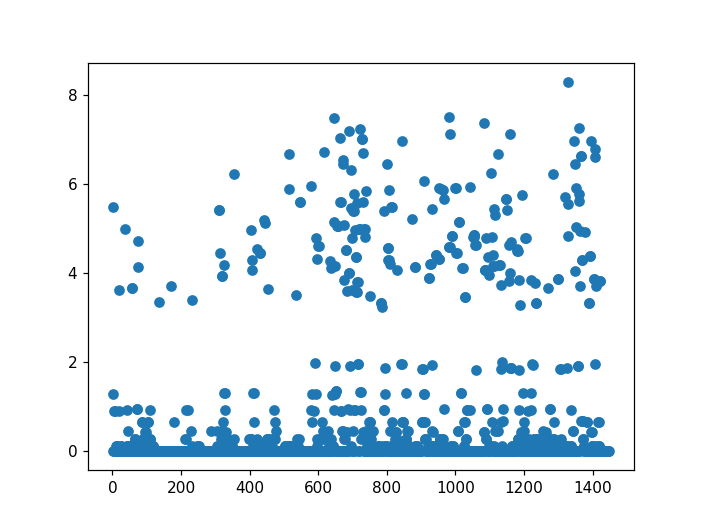

NF_LOS_ltg3mos	110000 ['Management Occupations'] [0.00203666 0.00181488 0.00117509 0.00108578 0.00110988 0.00092507
 0.00089206 0.00095147]
NF_LOS_ltg3mos	111000 ['Top Executives'] [0.01408451 0.01408451 0.01234568 0.0052356  0.01960784 0.03225806
 0.00383142 0.01639344]
NF_LOS_ltg3mos	111010 ['Chief Executives'] [1.         1.         1.         0.03225806 1.         1.
 0.004329   0.02439024]
NF_LOS_ltg3mos	111011 ['Chief Executives'] [1.         1.         1.         0.03225806 1.         1.
 0.004329   0.02439024]
NF_LOS_ltg3mos	111020 ['General and Operations Managers'] [0.01408451 0.01408451 0.01234568 0.00584795 0.01960784 0.03225806
 0.03225806 0.03225806]
NF_LOS_ltg3mos	111021 ['General and Operations Managers'] [0.01408451 0.01408451 0.01234568 0.00584795 0.01960784 0.03225806
 0.03225806 0.03225806]
NF_LOS_ltg3mos	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	112000 ['Advertising, Marketing, Pr

NF_LOS_ltg3mos	191042 ['Medical Scientists, Except Epidemiologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	191090 ['Miscellaneous Life Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	191099 ['Life Scientists, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192000 ['Physical Scientists'] [0.04761905 0.04761905 1.         1.         1.         0.04761905
 0.03225806 1.        ]
NF_LOS_ltg3mos	192010 ['Astronomers and Physicists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192011 ['Astronomers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192012 ['Physicists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192020 ['Atmospheric and Space Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192021 ['Atmospheric and Space Scientists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	192030 ['Chemists and Materials Scientists'] [0.04761905 1.         1.         1.         1.         1.
 1.         1.        ]
NF_LOS_ltg3mos	192031 ['Chemists'] [0.04761905 1.         1.         1.         1.      

NF_LOS_ltg3mos	251124 ['Foreign Language and Literature Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251125 ['History Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251126 ['Philosophy and Religion Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251190 ['Miscellaneous Postsecondary Teachers'] [0.03225806 0.04761905 0.03225806 0.04761905 0.03225806 0.02439024
 0.03225806 1.        ]
NF_LOS_ltg3mos	251192 ['Family and Consumer Sciences Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251193 ['Recreation and Fitness Studies Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251194 ['Career/Technical Education Teachers, Postsecondary'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	251199 ['Postsecondary Teachers, All Other'] [0.03225806 1.         0.04761905 0.04761905 0.04761905 0.03225806
 0.04761905 1.        ]
NF_LOS_ltg3mos	252000 ['Preschool, Elementary, Middle, Secondary, and Special Education 

NF_LOS_ltg3mos	292040 ['Emergency Medical Technicians and Paramedics'] [0.00332226 0.00255754 0.00383142 0.00497512 0.00302115 0.00332226
 0.00552486 0.00343643]
NF_LOS_ltg3mos	292042 ['Emergency Medical Technicians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	292043 ['Paramedics'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	292050 ['Health Practitioner Support Technologists and Technicians'] [0.00138696 0.00243309 0.00112233 0.00161031 0.00161031 0.00166389
 0.00107411 0.00096061]
NF_LOS_ltg3mos	292051 ['Dietetic Technicians'] [0.00226757 0.00452489 0.00277008 0.00355872 0.00398406 0.004329
 0.00414938 0.00321543]
NF_LOS_ltg3mos	292052 ['Pharmacy Technicians'] [0.04761905 0.04761905 1.         1.         0.03225806 1.
 0.01639344 0.03225806]
NF_LOS_ltg3mos	292053 ['Psychiatric Technicians'] [0.00826446 0.00900901 0.00763359 0.00452489 0.0052356  0.00552486
 0.00473934 0.00226757]
NF_LOS_ltg3mos	292055 ['Surgical Technologists'] [0.03225806 0.01639344 0.03225806 0.02439024 0.01639344 0.0090

NF_LOS_ltg3mos	439111 ['Statistical Assistants'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_LOS_ltg3mos	439190 ['Miscellaneous Office and Administrative Support Workers'] [0.00243309 0.01408451 0.00990099 0.00826446 0.00414938 0.00900901
 0.00763359 0.01639344]
NF_LOS_ltg3mos	439199 ['Office and Administrative Support Workers, All Other'] [0.00243309 0.01408451 0.00990099 0.00826446 0.00414938 0.00900901
 0.00763359 0.01639344]
NF_LOS_ltg3mos	450000 ['Farming, Fishing, and Forestry Occupations'] [0.0002666  0.00023804 0.00025833 0.00020829 0.0003095  0.00028563
 0.00031143 0.00025967]
NF_LOS_ltg3mos	451000 ['Supervisors of Farming, Fishing, and Forestry Workers'] [1.         0.04761905 1.         1.         1.         1.
 0.02439024 1.        ]
NF_LOS_ltg3mos	451010 ['FirstLine Supervisors of Farming, Fishing, and Forestry Workers'] [1.         0.04761905 1.         1.         1.         1.
 0.02439024 1.        ]
NF_LOS_ltg3mos	451011 ['FirstLine Supervisors of Farming, Fishing, and Forestry Worker

 0.0023753  0.00293255]
NF_LOS_ltg3mos	472181 ['Roofers'] [0.00584795 0.00473934 0.00262467 0.00369004 0.00232019 0.00144718
 0.0023753  0.00293255]
NF_LOS_ltg3mos	472210 ['Sheet Metal Workers'] [0.00414938 0.00398406 0.00900901 0.0052356  0.00900901 0.00826446
 0.00332226 0.00552486]
NF_LOS_ltg3mos	472211 ['Sheet Metal Workers'] [0.00414938 0.00398406 0.00900901 0.0052356  0.00900901 0.00826446
 0.00332226 0.00552486]
NF_LOS_ltg3mos	472220 ['Structural Iron and Steel Workers'] [0.00311526 0.00414938 0.00662252 0.00552486 0.00473934 0.00473934
 0.00355872 0.00584795]
NF_LOS_ltg3mos	472221 ['Structural Iron and Steel Workers'] [0.00311526 0.00414938 0.00662252 0.00552486 0.00473934 0.00473934
 0.00355872 0.00584795]
NF_LOS_ltg3mos	472230 ['Solar Photovoltaic Installers'] [1.         1.         1.         1.         0.03225806 1.
 1.         1.        ]
NF_LOS_ltg3mos	472231 ['Solar Photovoltaic Installers'] [1.         1.         1.         1.         0.03225806 1.
 1.         1.       

 0.02439024 0.01234568]
NF_LOS_ltg3mos	493051 ['Motorboat Mechanics and Service Technicians'] [1.         1.         0.00552486 1.         0.03225806 1.
 1.         0.01960784]
NF_LOS_ltg3mos	493052 ['Motorcycle Mechanics'] [1.         0.02439024 0.02439024 1.         1.         1.
 1.         1.        ]
NF_LOS_ltg3mos	493053 ['Outdoor Power Equipment and Other Small Engine Mechanics'] [1.         1.         0.03225806 1.         1.         1.
 0.03225806 0.03225806]
NF_LOS_ltg3mos	493090 ['Miscellaneous Vehicle and Mobile Equipment Mechanics, Installers, and Repairers'] [0.00175131 0.00900901 0.00302115 0.00212314 0.004329   0.002849
 0.00302115 0.00172117]
NF_LOS_ltg3mos	493091 ['Bicycle Repairers'] [1.         1.         1.         1.         0.01639344 1.
 0.01098901 1.        ]
NF_LOS_ltg3mos	493092 ['Recreational Vehicle Service Technicians'] [1.         1.         1.         0.04761905 1.         1.
 1.         0.01098901]
NF_LOS_ltg3mos	493093 ['Tire Repairers and Changers'] [

 0.01639344 0.00763359]
NF_LOS_ltg3mos	519021 ['Crushing, Grinding, and Polishing Machine Setters, Operators, and Tenders'] [0.01234568 0.01408451 0.01960784 0.01639344 0.02439024 1.
 0.03225806 0.01960784]
NF_LOS_ltg3mos	519022 ['Grinding and Polishing Workers, Hand'] [0.02439024 0.01639344 0.02439024 0.03225806 0.01960784 0.04761905
 1.         1.        ]
NF_LOS_ltg3mos	519023 ['Mixing and Blending Machine Setters, Operators, and Tenders'] [0.01639344 0.04761905 0.04761905 0.00990099 0.01098901 0.0070922
 0.03225806 0.01639344]
NF_LOS_ltg3mos	519030 ['Cutting Workers'] [0.00990099 0.02439024 0.01408451 0.00826446 0.03225806 0.00900901
 0.01234568 0.01098901]
NF_LOS_ltg3mos	519031 ['Cutters and Trimmers, Hand'] [0.04761905 1.         1.         0.04761905 1.         1.
 1.         1.        ]
NF_LOS_ltg3mos	519032 ['Cutting and Slicing Machine Setters, Operators, and Tenders'] [0.01408451 0.02439024 0.01639344 0.00990099 0.03225806 0.00900901
 0.01234568 0.01098901]
NF_LOS_ltg3mos	51

<IPython.core.display.Javascript object>


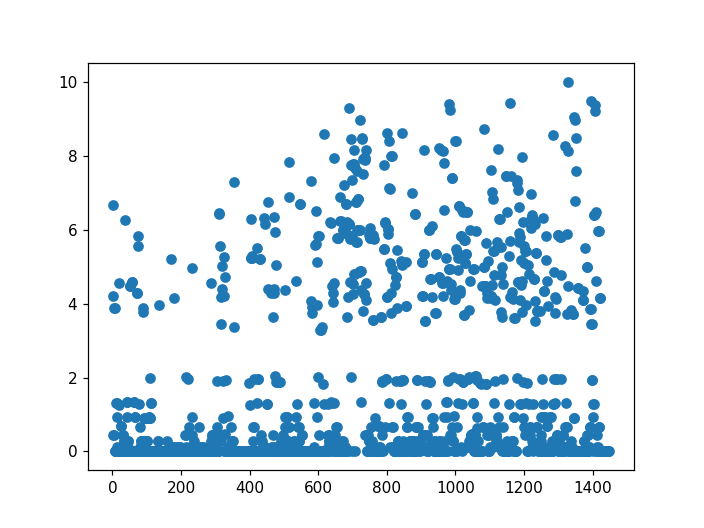

In [25]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level3_sockeys.keys():
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            print(db+"\t"+index,category,relative_totals)    
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            
    plt.figure(str(db) + ", mean per SOC code level 6")
    plt.plot(x,y,'o')
    plt.show()

In [26]:
#print(genericDB_files_dict.keys())